In [16]:
massachusettsCounties = [
    "Barnstable",
    "Berkshire",
    "Bristol",
    "Dukes",
    "Essex",
    "Franklin",
    "Hampden",
    "Hampshire",
    "Middlesex",
    "Nantucket",
    "Norfolk",
    "Plymouth",
    "Suffolk",
    "Worcester"
]

Retrieving data from Mateo

In [17]:
import pandas as pd

Mateo_df1 = pd.read_csv('../Dataset/raw_data/2022_massachusetts_counties_weather_data.csv')
Mateo_df2 = pd.read_csv('../Dataset/raw_data/2023_massachusetts_counties_weather_data.csv')
Mateo_df3 = pd.read_csv('../Dataset/raw_data/2024_massachusetts_counties_weather_data.csv')
Mateo_df = pd.concat([Mateo_df1, Mateo_df2, Mateo_df3])


In [18]:
raw_df = Mateo_df.copy()
for county in massachusettsCounties:
    AQI_df = pd.read_csv(f'../Dataset/raw_data/AQI/{county}_air_pollution_history.csv')
    # check if columns already exist
    if 'aqi' in raw_df.columns:
        raw_df.update(AQI_df.set_index('dt'))
    else:
        raw_df = pd.merge(raw_df, AQI_df, left_on='date', right_on='dt', how='left')
    
    
raw_df.head()
    
    

,date,county,latitude,longitude,weather_code,temperature_2m_max,temperature_2m_min,sunrise,sunset,daylight_duration,...,dt,aqi,co,no,no2,o3,so2,pm2_5,pm10,nh3
0,2022-01-01 04:00:00+00:00,Barnstable,41.7003,-70.3002,51.0,10.764999,7.265,0,0,33183.258,...,2022-01-01 04:00:00+00:00,1.0,303.75,0.0,4.37,53.64,0.61,3.06,3.57,0.03
1,2022-01-02 04:00:00+00:00,Barnstable,41.7003,-70.3002,61.0,10.065000,4.365,0,0,33229.547,...,2022-01-02 04:00:00+00:00,1.0,353.81,0.0,13.02,26.46,1.37,5.55,6.18,0.19
2,2022-01-03 04:00:00+00:00,Barnstable,41.7003,-70.3002,61.0,3.265000,-2.185,0,0,33279.840,...,2022-01-03 04:00:00+00:00,1.0,323.77,0.0,6.85,49.35,1.53,0.74,1.36,0.24
3,2022-01-04 04:00:00+00:00,Barnstable,41.7003,-70.3002,3.0,-1.235000,-6.135,0,0,33334.656,...,2022-01-04 04:00:00+00:00,2.0,270.37,0.0,1.32,81.54,0.63,0.50,0.83,0.15
4,2022-01-05 04:00:00+00:00,Barnstable,41.7003,-70.3002,63.0,10.865000,-3.235,0,0,33393.895,...,2022-01-05 04:00:00+00:00,2.0,270.37,0.0,1.91,90.12,0.66,0.66,1.11,0.19


Data Cleaning

In [19]:

filter_columns = ['date', 'county', 'latitude', 'longitude',
                  'weather_code', 
                  'daylight_duration', 'sunshine_duration', 
                  'temperature_2m_max', 'temperature_2m_min',
                  'uv_index_max',
                  'precipitation_probability_max', 
       'aqi']
raw_df_filtered = raw_df[filter_columns]
raw_df_filtered.head()

,date,county,latitude,longitude,weather_code,daylight_duration,sunshine_duration,temperature_2m_max,temperature_2m_min,uv_index_max,precipitation_probability_max,aqi
0,2022-01-01 04:00:00+00:00,Barnstable,41.7003,-70.3002,51.0,33183.258,0.000,10.764999,7.265,0.55,NaN,1.0
1,2022-01-02 04:00:00+00:00,Barnstable,41.7003,-70.3002,61.0,33229.547,0.000,10.065000,4.365,0.65,NaN,1.0
2,2022-01-03 04:00:00+00:00,Barnstable,41.7003,-70.3002,61.0,33279.840,0.000,3.265000,-2.185,0.90,NaN,1.0
3,2022-01-04 04:00:00+00:00,Barnstable,41.7003,-70.3002,3.0,33334.656,29448.775,-1.235000,-6.135,2.50,NaN,2.0
4,2022-01-05 04:00:00+00:00,Barnstable,41.7003,-70.3002,63.0,33393.895,7209.592,10.865000,-3.235,1.40,NaN,2.0


In [20]:
raw_df_summary = raw_df_filtered.describe()
raw_df_summary

,latitude,longitude,weather_code,daylight_duration,sunshine_duration,temperature_2m_max,temperature_2m_min,uv_index_max,precipitation_probability_max,aqi
count,14476.000000,14476.000000,14476.00000,14476.000000,14476.000000,14476.000000,14476.000000,14476.000000,322.000000,14252.000000
mean,42.109971,-71.444543,26.59457,44545.723873,26949.429297,16.067819,6.934637,4.783072,10.189441,1.943026
std,0.407960,0.938982,27.63209,7424.085993,15497.776943,9.693101,9.040514,2.218652,19.449387,0.751381
min,41.283500,-73.182200,0.00000,32548.720000,0.000000,-17.103500,-28.403500,0.100000,0.000000,1.000000
25%,41.793800,-72.600900,3.00000,37757.312250,14761.355750,8.363000,0.113375,2.800000,0.000000,1.000000
50%,42.236950,-71.163100,3.00000,44919.339500,29982.051000,16.465500,7.065250,4.900000,1.000000,2.000000
75%,42.400200,-70.752800,53.00000,51690.465250,39600.000000,24.266001,14.365500,6.850000,9.000000,2.000000
max,42.633400,-70.099500,95.00000,55145.277000,50798.797000,37.387000,26.117500,8.200000,86.000000,5.000000


In [21]:
# check for null values
raw_df_filtered.isnull().sum()

# columns with no values: sunrise, sunset


date                                 0
county                               0
latitude                             0
longitude                            0
weather_code                         0
daylight_duration                    0
sunshine_duration                    0
temperature_2m_max                   0
temperature_2m_min                   0
uv_index_max                         0
precipitation_probability_max    14154
aqi                                224
dtype: int64

In [32]:
# Outliers

min_values = {
    'sunshine_duration': 0.0, 'uv_index_max': 0.1, 'precipitation_probability_max': 0.0, 'aqi': 1.0
    }

for col in min_values.keys():
    min = raw_df_summary.loc['min', col]
    q1 = raw_df_summary.loc['25%', col]
    q3 = raw_df_summary.loc['75%', col]
    max = raw_df_summary.loc['max', col]
    IQR = q3-q1
    
    for i in range(len(raw_df_filtered)):
        val =  raw_df_filtered[col][i]
        if (val<(q1-1.5*IQR )):
            raw_df_filtered.loc[i, col] = min_values[col]
        elif (val>(q3+1.5*IQR )):
            raw_df_filtered.loc[i, col] = (q3+1.5*IQR )
            
raw_df_filtered.describe()

,latitude,longitude,weather_code,daylight_duration,sunshine_duration,temperature_2m_max,temperature_2m_min,uv_index_max,precipitation_probability_max,aqi
count,14476.000000,14476.000000,14476.00000,14476.000000,14476.000000,14476.000000,14476.000000,14476.000000,322.000000,14252.000000
mean,42.109971,-71.444543,26.59457,44545.723873,26949.429297,16.067819,6.934637,4.783072,5.776398,1.913556
std,0.407960,0.938982,27.63209,7424.085993,15497.776943,9.693101,9.040514,2.218652,8.542436,0.661846
min,41.283500,-73.182200,0.00000,32548.720000,0.000000,-17.103500,-28.403500,0.100000,0.000000,1.000000
25%,41.793800,-72.600900,3.00000,37757.312250,14761.355750,8.363000,0.113375,2.800000,0.000000,1.000000
50%,42.236950,-71.163100,3.00000,44919.339500,29982.051000,16.465500,7.065250,4.900000,1.000000,2.000000
75%,42.400200,-70.752800,53.00000,51690.465250,39600.000000,24.266001,14.365500,6.850000,9.000000,2.000000
max,42.633400,-70.099500,95.00000,55145.277000,50798.797000,37.387000,26.117500,8.200000,22.500000,3.500000


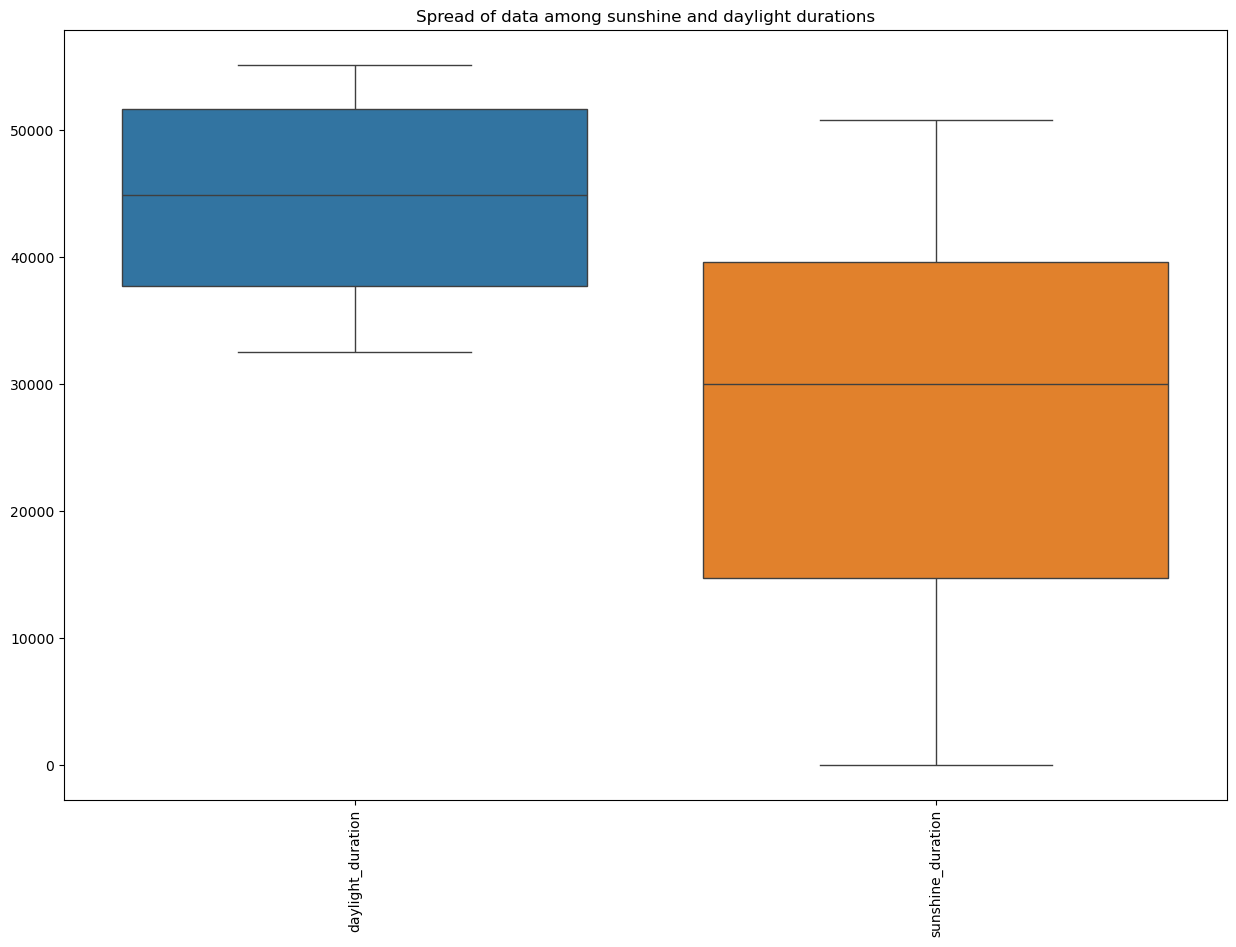

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

group1 = ['daylight_duration', 'sunshine_duration']

plt.figure(figsize=(15,10))
sns.boxplot(data=raw_df_filtered[group1])
plt.xticks(rotation=90)
plt.title('Spread of data among sunshine and daylight durations')
plt.show()


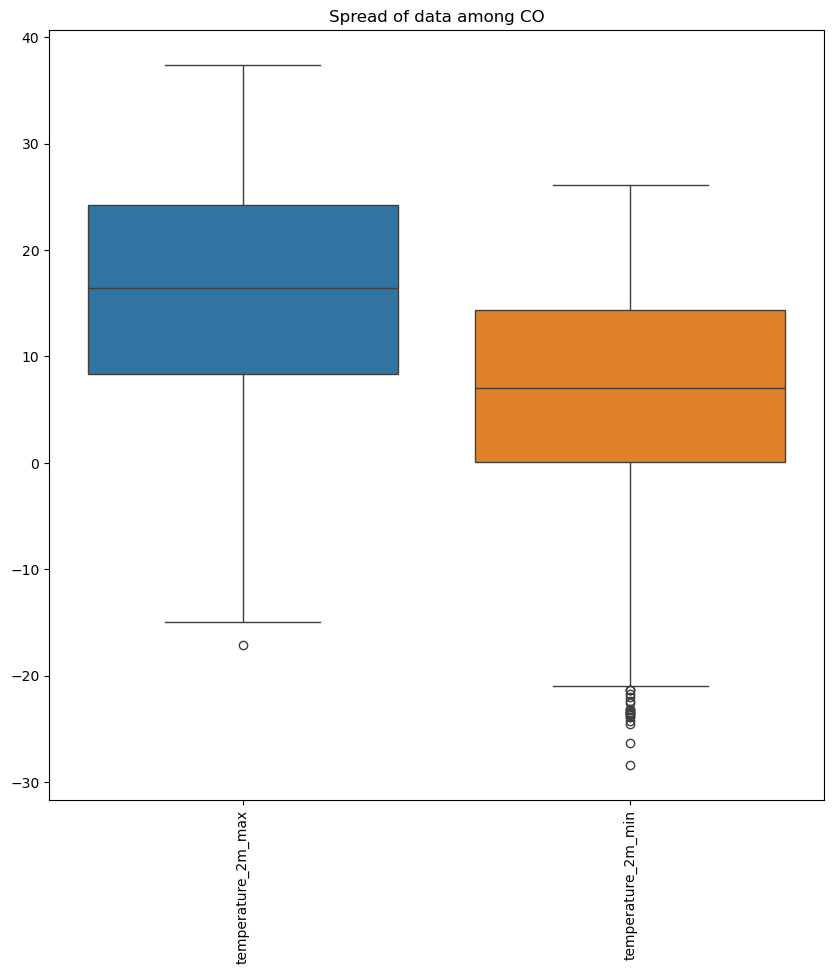

In [28]:
temp = ['temperature_2m_max', 'temperature_2m_min']

plt.figure(figsize=(10,10))
sns.boxplot(data=raw_df_filtered[temp])
plt.xticks(rotation=90)
plt.title('Spread of data among CO')
plt.show()

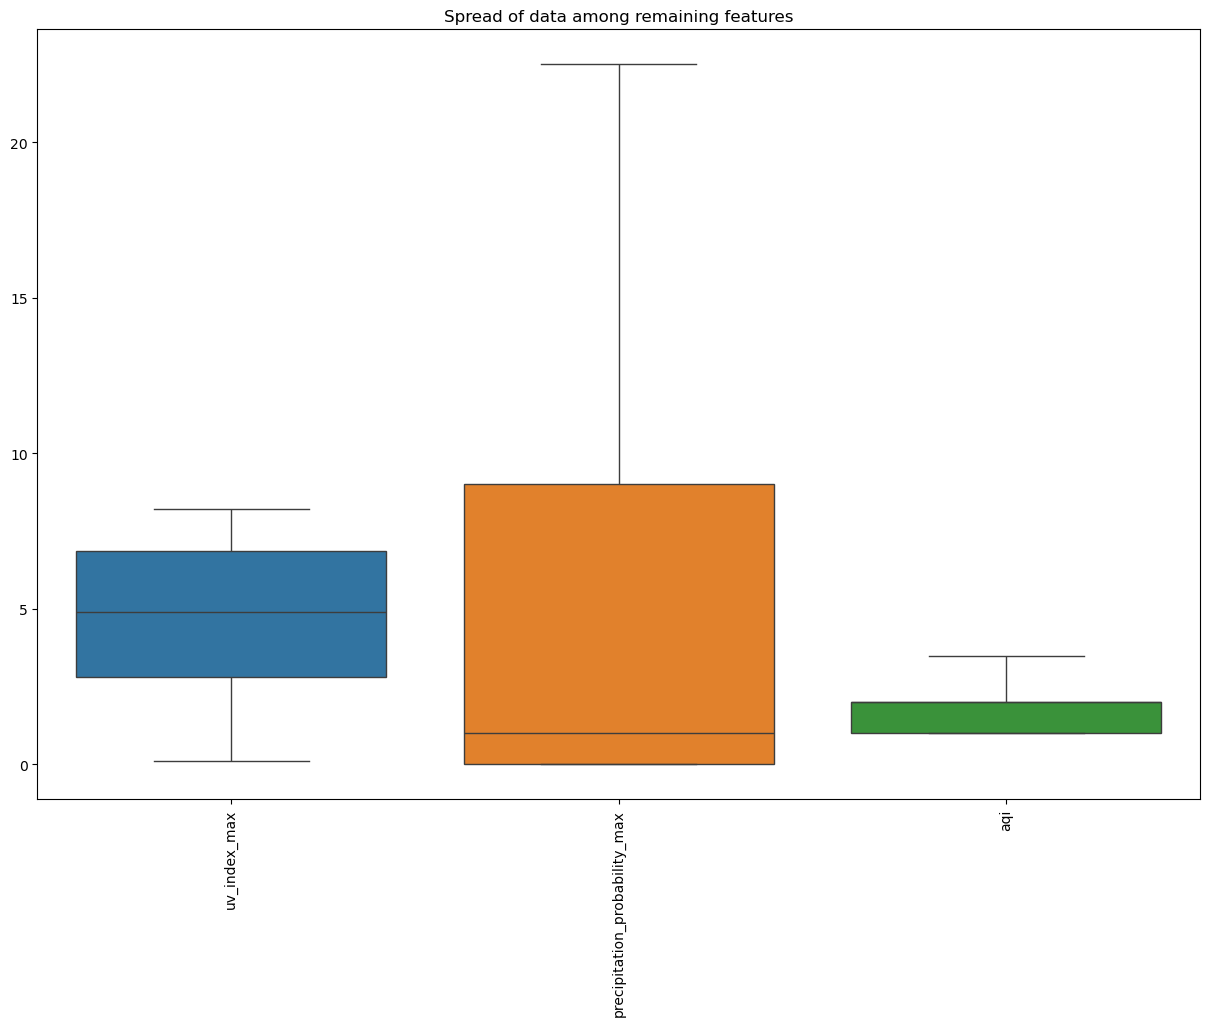

In [31]:
group4 = group1+temp

plt.figure(figsize=(15,10))
sns.boxplot(data=raw_df_filtered.drop(columns=(group4+['weather_code', 'latitude', 'longitude'])))
plt.xticks(rotation=90)
plt.title('Spread of data among remaining features')
plt.show()

Not sure what sunrise and sunset are for